In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

In [2]:
data = pd.read_csv('crop.csv')
data.head()

,density,block,fertilizer,yield
0,1,1,1,177.228692
1,2,2,1,177.550041
2,1,3,1,176.408462
3,2,4,1,177.703625
4,1,1,1,177.125486


In [3]:
data.describe()

,density,block,fertilizer,yield
count,96.000000,96.000000,96.000000,96.000000
mean,1.500000,2.500000,2.000000,177.015476
std,0.502625,1.123903,0.820783,0.664548
min,1.000000,1.000000,1.000000,175.360840
25%,1.000000,1.750000,1.000000,176.468696
50%,1.500000,2.500000,2.000000,177.058105
75%,2.000000,3.250000,3.000000,177.398571
max,2.000000,4.000000,3.000000,179.060899


# Q1

In [4]:
# extract the 'yield' data of different types.
density_1 = data['yield'][data.density==1]
density_2 = data['yield'][data.density==2]

In [5]:
# perform two sample F-test as follows
ddof_1 = len(density_1) - 1
ddof_2 = len(density_2) - 1
test_stats = np.var(density_1, ddof=1)/np.var(density_2, ddof=1)
pvalue = stats.f.cdf(test_stats, ddof_1, ddof_2)

test_stats, pvalue

(0.8887225429155494, 0.3437976926678219)

The p-value obtained is greater than the significance level $\alpha=0.05$, thus we fail to reject the null hypothesis.

We thus consider the two types of density result in the same variance of yield at significance level 0.05

# Q2

We perform a two-sample T-test for unknown but equal variance populations.

In [6]:
stats.ttest_ind(density_1, density_2, equal_var=True)

Ttest_indResult(statistic=-3.6153828803630663, pvalue=0.00048451706997438567)

The p-value is smaller than 0.05. Thus we reject the null hypothesis and consider the mean are different.

# Q3

## (a)

In [7]:
fertilizer_1 = data['yield'][data.fertilizer==1]
fertilizer_2 = data['yield'][data.fertilizer==2]
fertilizer_3 = data['yield'][data.fertilizer==3]

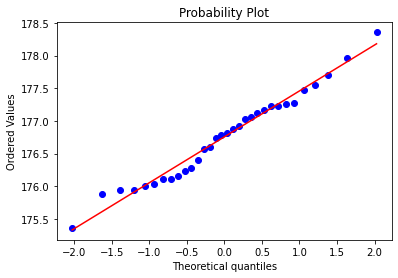

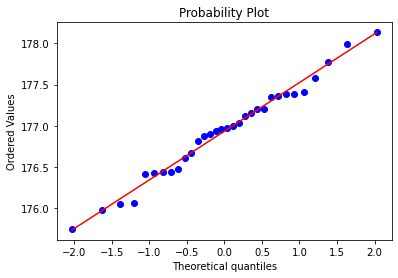

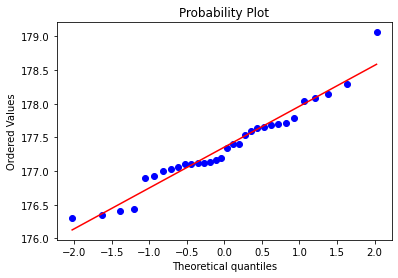

In [8]:
stats.probplot(fertilizer_1,dist='norm',plot=plt)
plt.show()
stats.probplot(fertilizer_2,dist='norm',plot=plt)
plt.show()
stats.probplot(fertilizer_3,dist='norm',plot=plt)
plt.show()

## (b)

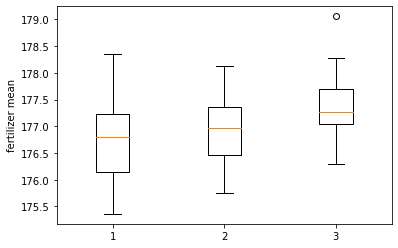

In [9]:
fig, ax = plt.subplots(1, 1)
ax.boxplot([fertilizer_1, fertilizer_2, fertilizer_3])
ax.set_xticklabels(["1", "2", "3"]) 
ax.set_ylabel("fertilizer mean") 
plt.show()

## (c)

In [10]:
stats.bartlett(fertilizer_1, fertilizer_2, fertilizer_3)

BartlettResult(statistic=1.0622432806639672, pvalue=0.5879451367215631)

The pvalue is very large compared with commonly small significance level, say 0.05, 0.01.
Thus we cannot reject the null hypothesis and consider them having the same variance.

## (d)

In [11]:
stats.f_oneway(fertilizer_1, fertilizer_2, fertilizer_3)

F_onewayResult(statistic=7.862751645215487, pvalue=0.0006999157502874401)

At a significance level 0.001, we reject the null hypothesis and consider the means are not the same.

## (e)

In [12]:
print(stats.ttest_ind(fertilizer_1, fertilizer_2, equal_var=True))
print(stats.ttest_ind(fertilizer_2, fertilizer_3, equal_var=True))
print(stats.ttest_ind(fertilizer_1, fertilizer_3, equal_var=True))

Ttest_indResult(statistic=-1.1151144203063066, pvalue=0.2691051510313381)
Ttest_indResult(statistic=-2.8834962237133284, pvalue=0.005400051057378574)
Ttest_indResult(statistic=-3.7244341523148, pvalue=0.00042491974838636016)


In [13]:
0.05/6

0.008333333333333333

If we specify $\alpha=0.05$, by the Bonferonni adjustment, we scale it by $0.05/6=0.0083$

Based on the pvalue we obtained, we consider the means of fertilizer_1 and fertilizer_2 are the same, which is different from fertilizer_3.

## (f)

In [14]:
res = stats.tukey_hsd(fertilizer_1, fertilizer_2, fertilizer_3)
print(res)

Tukey's HSD Pairwise Group Comparisons (95.0% Confidence Interval)
Comparison  Statistic  p-value  Lower CI  Upper CI
 (0 - 1)     -0.176     0.495    -0.546     0.194
 (0 - 2)     -0.599     0.001    -0.969    -0.229
 (1 - 0)      0.176     0.495    -0.194     0.546
 (1 - 2)     -0.423     0.021    -0.793    -0.053
 (2 - 0)      0.599     0.001     0.229     0.969
 (2 - 1)      0.423     0.021     0.053     0.793

